# Statistics AI & ML Report

_for usability purposes code was written in main.py and tested/ran in main.ipynb_

> **The petal_width and petal_length columns will used all along the project to reduce confusing analysis**


In [1]:
from main import Statistics_ai

petal_width_ci = Statistics_ai(test="petal_width")


## 1. Descriptive statistics

---

- > To get a summary description of the data or dataframe, i used pandas's describe function to return a summary
- > Further below I also the more specic descriptive funtions to return mean, median, mode, standard deviation and skewness
- > An alternate way of calculating these measurements would be to use numpy. For the mean would be computed as numpy.mean(dataframe['sepal_width'])


In [2]:
petal_width_ci.description("setosa")


Description for setosa 
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000


The above could be gotten by using pandas mean() or meadian() 
for example to compute the mean for setosa[petal_width] would be setosa[petal_width].mean() 
sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

Median: sepal_length    5.0
sepal_width     3.4
petal_length    1.5
petal_width     0.2
dtype: float64

Mode:    sepal_length  sepal_width  petal_length  petal_width
0       

> The visualisation below shows the distribution of the dataframe while also showing where the mean and median are within the dataframe.

> As per _seaborn documentation (kde) :_

> The kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.


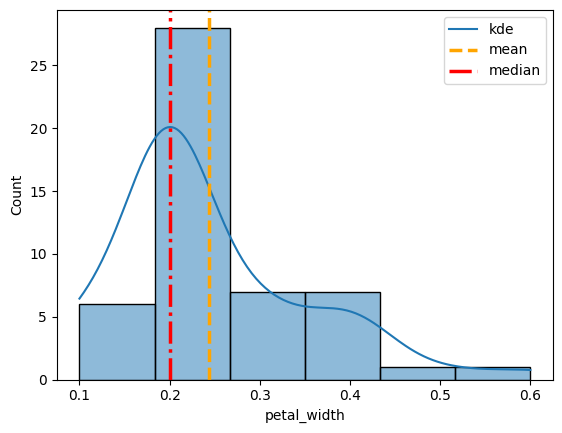

In [3]:
petal_width_ci.visual_description("setosa")


## 2. Confidence Interval

---

> **The confidence_interval for the mean function below will return the confidence interval for all three dataframes, i.e setosa, versicolor, virginica**

- > The result can be interpreted as folows :
- > _With a 95% confidence interval, as per the argument passed in the function we can say that:_

1. > a setosa petal will have a width within 0.214 and 0.274
2. > a verginica petal will have a width within 1.948 and 2.104
3. > a versicolor petal will have a width within 1.27 and 1.382


In [4]:
petal_width_ci.confidence_interval(95)


Confidence interval with confidence grade of 95 for petal_width of the dataframes are: 
 
setosa["petal_width"] between 0.214 and 0.274 

verginica["petal_width"] between 1.948 and 2.104 

versicolor["petal_width"] between 1.27 and 1.382 



## 2. Hypothesis Testing

---

> **For the mean_hypothesis_test() below:**

- > **H0: setosa['petal_width'] = versicolor['petal_width']**
- > **Ha: setosa['petal_width] ≠ versicolor['petal_width]**


In [5]:
petal_width_ci.mean_hypothesis_test(noll_df="setosa", other_df="versicolor")


Hypothesis rejected because p_value(1.53779680512802e-47) is less than 0.05 which is the significance level

Alternatively, We could compare the result.statistic from the ttest_ind 

hypothesis not rejected since t_statistic(-34.01237858829048) is less than 1.6448536269514722 which is the critical value


> **Due to the significantly large difference between petals and sepals of the diferent dataframes, a better hypothesis testing would be to check how big the difference is between two properties. For example, from the example above, how big a difference is a setosa['sepal_width'] from versicolor['sepal_width]**

> For that, I used the **_statsmodel module_**.


In [6]:
petal_width_ci.compare_means(noll_df="versicolor", other_df="setosa")



Using the statsmodel compare means, I can conclude that, using 0.05 significance level, versicolor[petal_width] is greater than setosa[petal_width] by a value found within the lower ci: 1.0186344109054177 and upper ci 1.1453655890945815


## 3. Correlation

---


>

- > Used to quantify the relationship between an explanatory variable (x) and a
  > response variable (y).
- > In the graph below, the explanatory variable is the petal_width while the response variable is the petal_length
- > As seen below, the petal_length and petal_width are strongly related as a bigger petal_length gives a big petal_width as well.

>


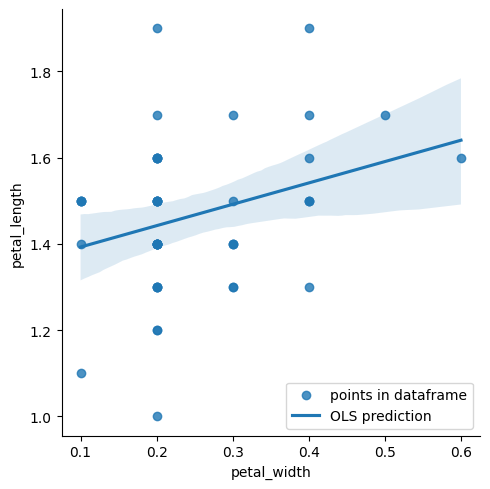

In [7]:
petal_width_ci.correlation_within_class("setosa", "petal_length")


> For clarity reasons, a sepal length and sepal width as opposed to petals, were also checked as shown below.


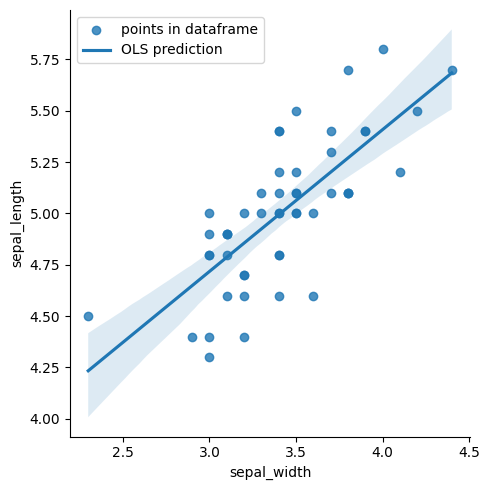

In [8]:
sepal_w = Statistics_ai("sepal_width")

sepal_w.correlation_within_class("setosa", "sepal_length")


> All the flower classes have a similar correlation in terms of petal width and length.


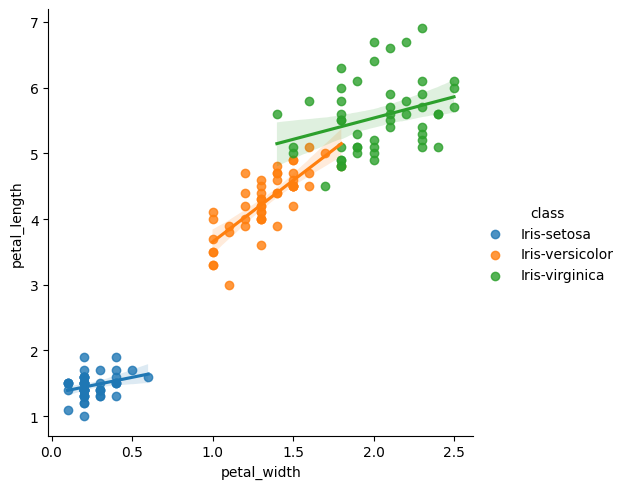

In [9]:
petal_width_ci.correlation_in_all_classes("petal_length")


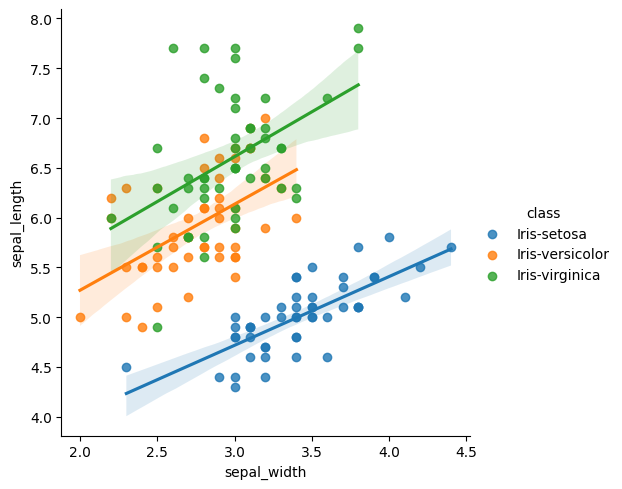

In [10]:
sepal_w.correlation_in_all_classes("sepal_length")


An alternative diagram for showing the correlation between the properties in the setosa class for example, would be to use a heatmap.

- > From the heatmap below, a 0.75 shows a strong correlation between sepal_width and the sepal_length

- > Similarly a 0.18 shows a weak correlation between petal length and a sepal width.


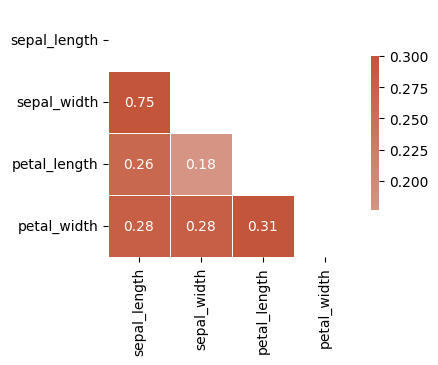

In [11]:
petal_width_ci.correlation_heat_map("setosa")


## 4. Regression

---

- > The regression analysis below is used to predict values out of the sample
- > With a 0.05 confidence level, I can predict a petal to have a length and width within the lower prediction limit and upper prediction level as shown below

- > The "r" on the diagram represents the correlation coefficient. It measures the strength and direction of the relationship between two variables, for example petal_width and petal_length as shown on the diagram below.
- > r, can range from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no relation and 1 indicates a strong positive correlation


   petal_width
0         0.00
1         1.25
2         2.50
3         3.75
4         5.00


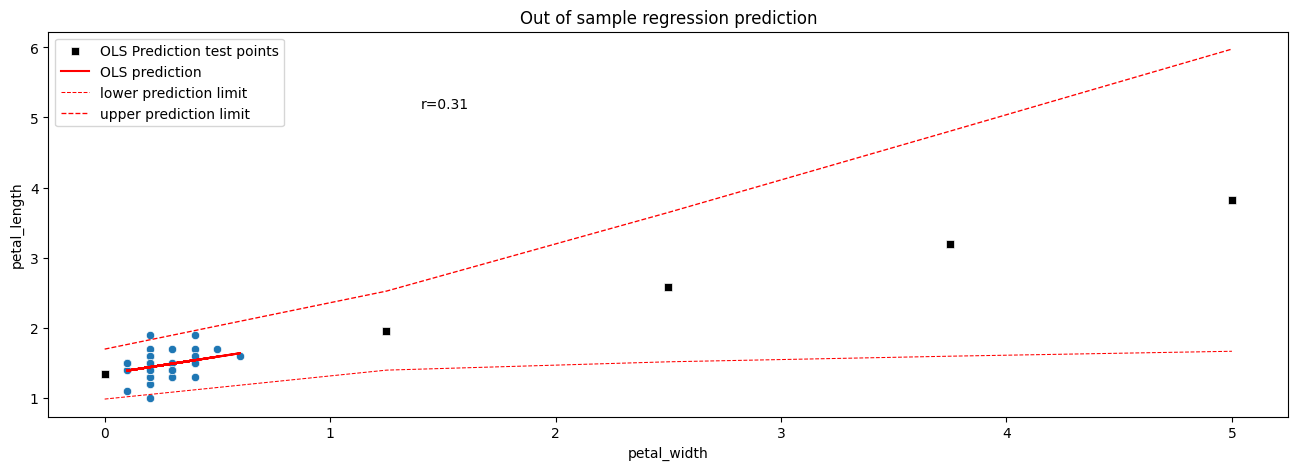

In [12]:
petal_width_ci.prediction_interval_out_of_our_sample_space('setosa', 'petal_length')

-------

- > The analysis below is used to predict petal_lengths out of sample given observations of petal_width in the setosa dataframe

- > In the diagram it is obeserved, even the petal_lengths have thesame Pearson correlation coefficinet of 0.31

   petal_length
0          0.00
1          1.25
2          2.50
3          3.75
4          5.00


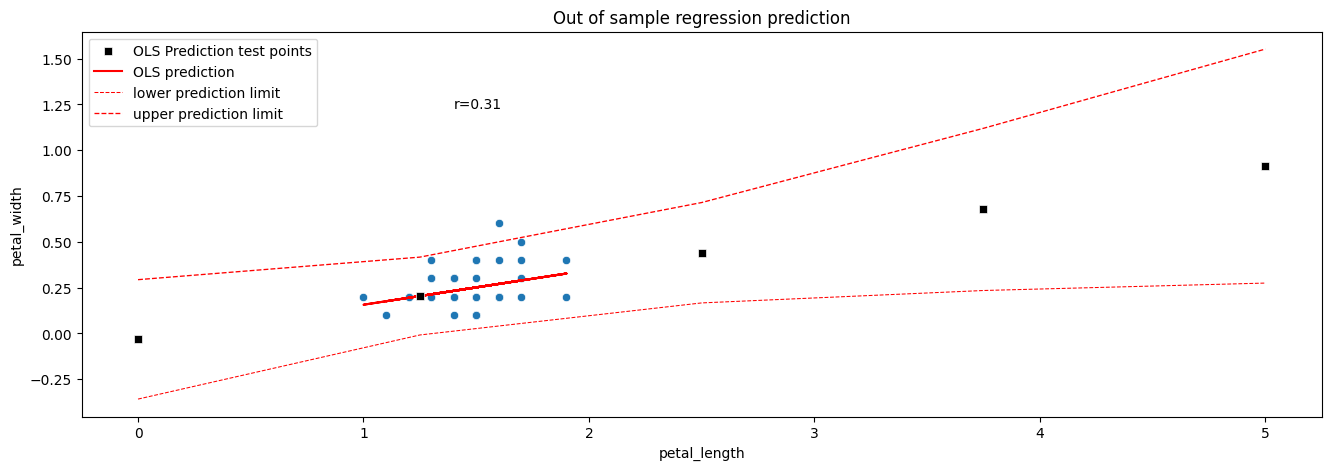

In [13]:
petal_length = Statistics_ai(test='petal_length')
petal_length.prediction_interval_out_of_our_sample_space('setosa', 'petal_width')

---------------------

- > The analysis below is for an in sample prediction to predict petal_widths given observations of petal_length in the setosa dataframe

- > As with all the previous tests, it also shows a Pearsson correlation coefficient of 0.31

- > This again clearly shows that irrespective of which prediction is done, be it an 'in-sample' or 'out-of-sample' prediction, we get thesame result

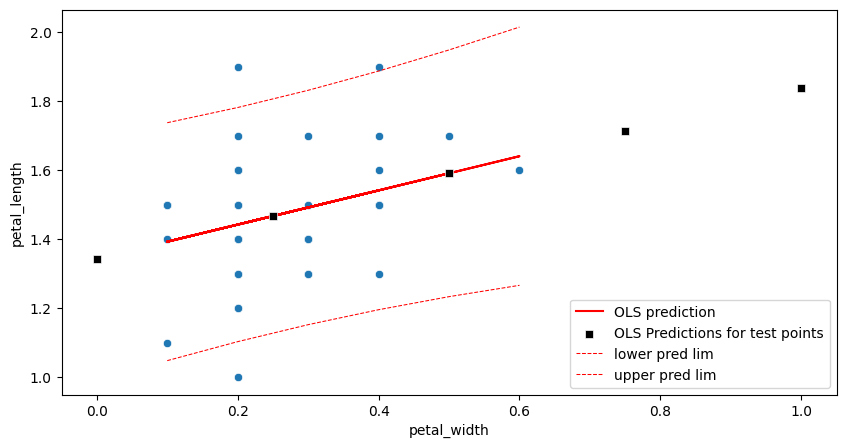

In [14]:
petal_width_ci.prediction_interval_in_our_sample_space('setosa', 'petal_length')

------

- > The analysis below is for an in sample prediction to predict petal_lengths given observations of petal_widths in the setosa dataframe

- > As with all the previous tests, it also shows a Pearsson correlation coefficient of 0.31

- > This again clearly shows that irrespective of which prediction is done, be it an 'in-sample' or 'out-of-sample' prediction, we get thesame result

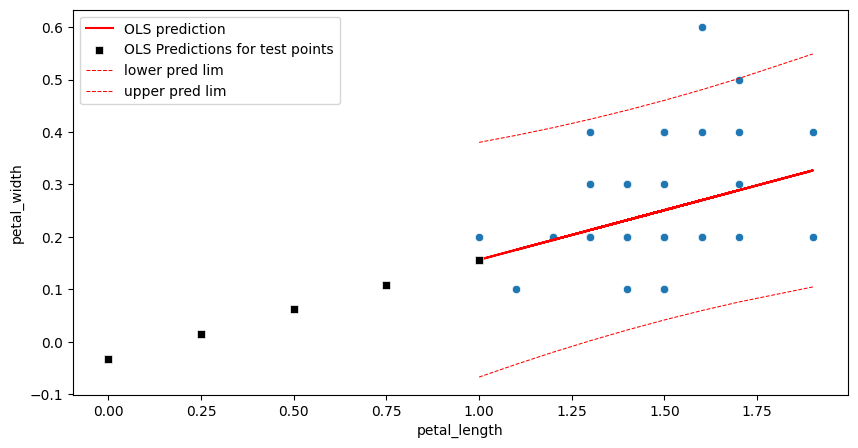

In [15]:
petal_length.prediction_interval_in_our_sample_space('setosa', 'petal_width')